In [ ]:
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Activation,Dropout
from sklearn.metrics import mean_squared_error

In [ ]:
from matplotlib import pyplot
import numpy as np

In [ ]:
df=pd.read_csv("weatherHistory.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49165 entries, 0 to 49164
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            49165 non-null  object 
 1   Summary                   49165 non-null  object 
 2   Precip Type               49165 non-null  object 
 3   Temperature (C)           49165 non-null  float64
 4   Apparent Temperature (C)  49165 non-null  float64
 5   Humidity                  49165 non-null  float64
 6   Wind Speed (km/h)         49165 non-null  float64
 7   Wind Bearing (degrees)    49165 non-null  float64
 8   Visibility (km)           49165 non-null  float64
 9   Loud Cover                49164 non-null  float64
 10  Pressure (millibars)      49164 non-null  float64
 11  Daily Summary             49164 non-null  object 
dtypes: float64(8), object(4)
memory usage: 4.5+ MB


In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df=df.drop(['Daily Summary'],axis=1)

In [ ]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  1
Pressure (millibars)        1
dtype: int64

In [ ]:
df.rename(columns={'Precip Type':'PrecipType'},inplace=True)

In [ ]:
df.PrecipType[df.PrecipType == 'rain'] = 0
df.PrecipType[df.PrecipType == 'snow'] = 1

<ipython-input-10-fe5e2fa2d8c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.PrecipType[df.PrecipType == 'rain'] = 0
<ipython-input-10-fe5e2fa2d8c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.PrecipType[df.PrecipType == 'snow'] = 1


In [ ]:
df.isnull().sum()

Formatted Date              0
Summary                     0
PrecipType                  0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  1
Pressure (millibars)        1
dtype: int64

In [ ]:
df.head()

,Formatted Date,Summary,PrecipType,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

Formatted Date              0
Summary                     0
PrecipType                  0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [ ]:
df.rename(columns={"Temperature (C)":"Temperature","Wind Speed (km/h)":"WindSpeed","Wind Bearing (degrees)":"WindBearings","Visibility (km)":"Visibilty","Loud Cover":"LoudCover","Pressure (millibars)":"Pressure","Apparent Temperature (C)":"ApparentTemperature"},inplace=True)

In [ ]:
df.head()

,Formatted Date,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearings,Visibilty,LoudCover,Pressure
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [ ]:
df.Summary.unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast'], dtype=object)

In [ ]:
df.LoudCover.unique()

array([0.])

In [ ]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearings,Visibilty,LoudCover,Pressure
Temperature,1.000000,0.992478,-0.637634,0.011189,0.023104,0.370702,NaN,-0.038863
ApparentTemperature,0.992478,1.000000,-0.607291,-0.056907,0.018401,0.359082,NaN,-0.037106
Humidity,-0.637634,-0.607291,1.000000,-0.235131,0.006531,-0.329638,NaN,0.010397
WindSpeed,0.011189,-0.056907,-0.235131,1.000000,0.124187,0.126961,NaN,-0.045841
WindBearings,0.023104,0.018401,0.006531,0.124187,1.000000,0.058135,NaN,-0.008477
Visibilty,0.370702,0.359082,-0.329638,0.126961,0.058135,1.000000,NaN,0.008779
LoudCover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure,-0.038863,-0.037106,0.010397,-0.045841,-0.008477,0.008779,NaN,1.000000


In [ ]:
df=df.drop(['LoudCover'],axis=1)

<ipython-input-21-b4b1b00bc1f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr())


<Axes: >

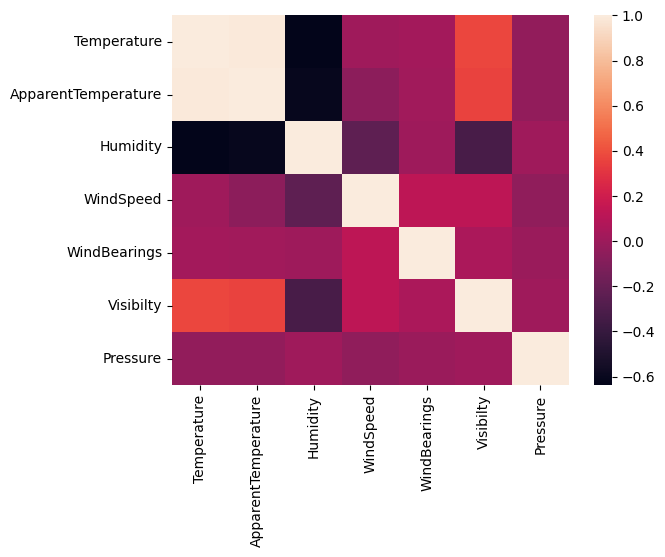

In [ ]:
sn.heatmap(df.corr())

In [ ]:
df.head()

,Formatted Date,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearings,Visibilty,Pressure
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [ ]:
print(len(df.Summary.unique()))
df.Summary.unique()

21


array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
df.Summary[:] = labelencoder_X.fit_transform(df.Summary[:])

<ipython-input-24-217a850afdf1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Summary[:] = labelencoder_X.fit_transform(df.Summary[:])


In [ ]:
df.Summary.unique()

array([15, 13, 14, 9, 2, 5, 4, 3, 10, 12, 17, 19, 1, 20, 0, 8, 18, 6, 7,
       16, 11], dtype=object)

In [ ]:
print(len(df.Summary.unique()))

21


In [ ]:
df.head()

,Formatted Date,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearings,Visibilty,Pressure
0,2006-04-01 00:00:00.000 +0200,15,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,15,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,13,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,15,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,13,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
df=df.drop('Formatted Date',axis=1)

In [ ]:
df.index.name='date'

In [ ]:
df.head()

,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearings,Visibilty,Pressure
date,,,,,,,,,
0,15,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,15,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,13,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,15,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,13,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [ ]:
df=df.drop('ApparentTemperature',axis=1)

In [ ]:
df.to_csv("weather.csv")

In [ ]:
df.head()

,Summary,PrecipType,Temperature,Humidity,WindSpeed,WindBearings,Visibilty,Pressure
date,,,,,,,,
0,15,0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,15,0,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,13,0,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,15,0,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,13,0,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [ ]:
data=df.values
print(df.Temperature.min())
df.Temperature.max()

-16.666666666666668


39.90555555555555

In [ ]:
# ensure all data is float
data=data.astype('float32')

In [ ]:
# normalize features
scaler=MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(data)

In [ ]:
# specify no. of lag hours
n_hours = 3
n_features = 8

In [ ]:
# frame as supervised learning
reframed = series_to_supervised(scaled,n_hours,1)
print(reframed.shape)

(49162, 32)


In [ ]:
print(reframed)

       var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3           0.75        0.0   0.462045       0.89   0.221130   0.699164   
4           0.75        0.0   0.459982       0.86   0.223399   0.721448   
5           0.65        0.0   0.460375       0.89   0.061523   0.568245   
6           0.75        0.0   0.441127       0.83   0.220877   0.749304   
7           0.65        0.0   0.449376       0.83   0.172970   0.721448   
...          ...        ...        ...        ...        ...        ...   
49160       0.70        0.0   0.419130       0.93   0.262985   0.420613   
49161       0.65        0.0   0.418246       0.93   0.190872   0.445682   
49162       0.65        0.0   0.430129       0.89   0.222138   0.420613   
49163       0.65        0.0   0.433762       0.89   0.217347   0.473538   
49164       0.65        0.0   0.455072       0.88   0.211548   0.445682   

       var7(t-3)  var8(t-3)  var1(t-2)  var2(t-2)  ...  var7(t-1)  var8(t-1)  \
3          0.983   

In [ ]:
values = reframed.values

In [ ]:
n_train_hours=365*24

In [ ]:
train = values[:n_train_hours,:]
test = values[n_train_hours:, : ]

In [ ]:
# split into input and outputs
n_obs = n_hours * n_features
train_X,train_Y = train[:,:n_obs],train[:,-6]   # as at 6th no. from last is temp. our o/p var
test_X,test_Y = test[:,:n_obs],test[:,-6]

In [ ]:
print(test_Y)

[0.49661204 0.4954336  0.4788373  ... 0.4746146  0.47697145 0.49258572]


In [ ]:
print(train_X.shape,len(train_X),train_Y.shape)

(8760, 24) 8760 (8760,)


In [ ]:
# reshape input to be 3D [samples, timesteps, fetures]
train_X = train_X.reshape((train_X.shape[0],n_hours,n_features))
test_X = test_X.reshape((test_X.shape[0],n_hours,n_features))  # 24 = 3 * 8
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(8760, 3, 8) (8760,) (40402, 3, 8) (40402,)


In [ ]:
hidden_nodes = int(2/3 * (train_X.shape[1] * train_X.shape[2]))
print(hidden_nodes)

16


In [ ]:
# design network
model = Sequential()
model.add(LSTM(30, input_shape=(train_X.shape[1], train_X.shape[2])))    # input_shape=(no. of i/p, dimension), result=(1,50)
# test
model.add(Dense(256,name='FC1'))  #256
model.add(Activation('relu'))
model.add(Dropout(0.2))
# end
model.add(Dense(1,name='out_layer'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                4680      
                                                                 
 FC1 (Dense)                 (None, 256)               7936      
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257       
                                                                 
Total params: 12,873
Trainable params: 12,873
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit network
history = model.fit(train_X, train_Y, epochs=100, batch_size=128, validation_data=(test_X, test_Y), verbose=2, shuffle=False)  #, verbose=2, shuffle=False

Epoch 1/100
69/69 - 5s - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.0167 - val_mean_squared_error: 0.0167 - 5s/epoch - 76ms/step
Epoch 2/100
69/69 - 1s - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0092 - val_mean_squared_error: 0.0092 - 1s/epoch - 16ms/step
Epoch 3/100
69/69 - 2s - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - 2s/epoch - 24ms/step
Epoch 4/100
69/69 - 2s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0031 - val_mean_squared_error: 0.0031 - 2s/epoch - 27ms/step
Epoch 5/100
69/69 - 1s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0024 - val_mean_squared_error: 0.0024 - 1s/epoch - 17ms/step
Epoch 6/100
69/69 - 2s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0021 - val_mean_squared_error: 0.0021 - 2s/epoch - 24ms/step
Epoch 7/100
69/69 - 1s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0022 - val_mean_squared_error: 0.0022 - 1s/epoch - 15ms/step
Epoch 

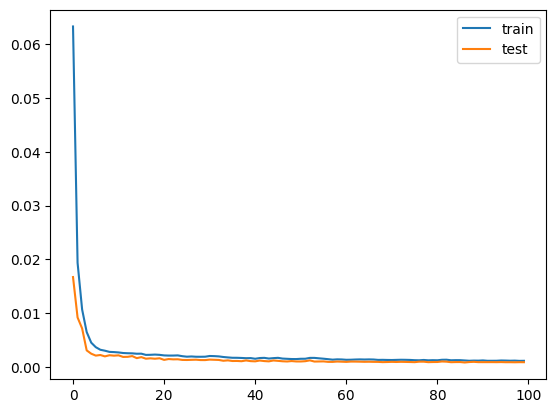

In [ ]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make a prediction
test_Y_predicted = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

1263/1263 [==============================] - 3s 2ms/step


In [ ]:
print(test_Y_predicted)
print(test_Y)

[[0.4310603 ]
 [0.50056744]
 [0.5056354 ]
 ...
 [0.47146693]
 [0.49627632]
 [0.49384266]]
[0.49661204 0.4954336  0.4788373  ... 0.4746146  0.47697145 0.49258572]


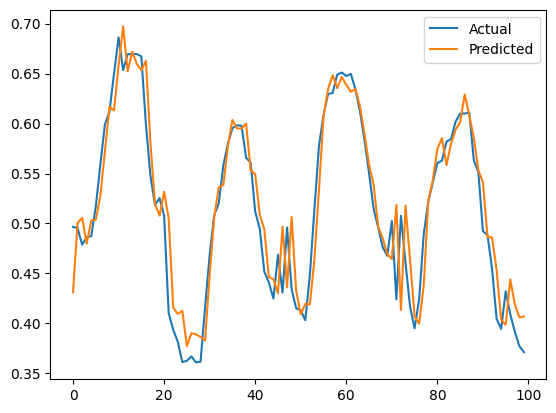

In [ ]:
pyplot.plot(test_Y[:100],label="Actual")
pyplot.plot(test_Y_predicted[:100],label="Predicted")
pyplot.legend()

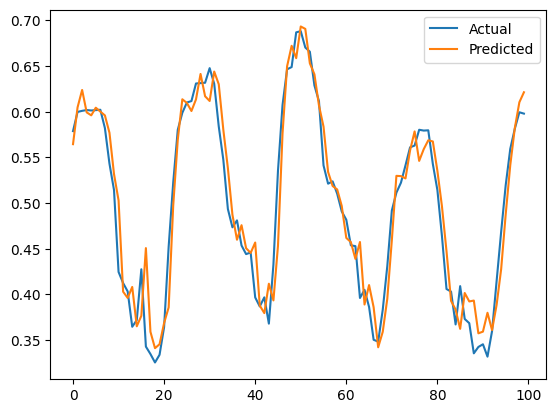

In [ ]:
pyplot.plot(test_Y[200:300],label="Actual")
pyplot.plot(test_Y_predicted[200:300],label="Predicted")
pyplot.legend()

In [ ]:
# invert scaling for forecast
vir_array= np.concatenate((test_X[:,-8:-6],test_Y_predicted),axis=1)
inv_test_Y_predicted = np.concatenate((vir_array,test_X[:,-5:]),axis=1)
inv_test_Y_predicted = scaler.inverse_transform(inv_test_Y_predicted)
inv_test_Y_predicted = inv_test_Y_predicted[:,2]
print(inv_test_Y_predicted)

[ 7.7193713 11.651544  11.938249  ... 10.005263  11.408786  11.271108 ]


In [ ]:
# invert scaling for actual
test_Y = test_Y.reshape((len(test_Y), 1))
vir_array2= np.concatenate((test_X[:,-8:-6],test_Y),axis=1)
inv_test_Y = np.concatenate((vir_array2,test_X[:,-5:]),axis=1)
inv_test_Y = scaler.inverse_transform(inv_test_Y)
inv_test_Y = inv_test_Y[:,2]
print(inv_test_Y)

[11.427778 11.361111 10.422222 ... 10.183333 10.316666 11.2     ]


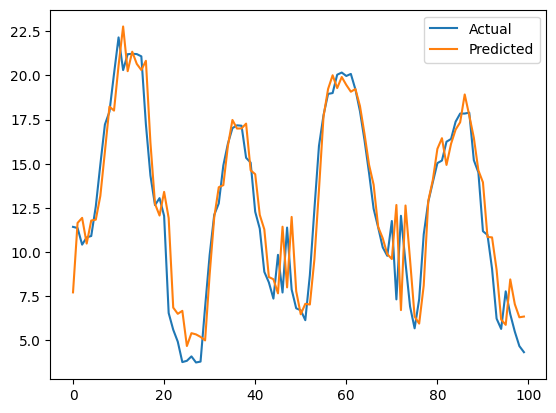

In [ ]:
pyplot.plot(inv_test_Y[:100],label="Actual")
pyplot.plot(inv_test_Y_predicted[:100],label="Predicted")
pyplot.legend()

In [ ]:
# calculate RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(inv_test_Y, inv_test_Y_predicted))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.665


In [ ]:
# comparing actual temperature and predicted temperature predicted using data of 3 previous hours
df_result=pd.DataFrame({'Actual_Temperature':inv_test_Y,'Predicted_Temperature':inv_test_Y_predicted})

In [ ]:
df_result

,Actual_Temperature,Predicted_Temperature
0,11.427778,7.719371
1,11.361111,11.651544
2,10.422222,11.938249
3,10.833332,10.482141
4,10.911110,11.787561
...,...,...
40397,7.872223,8.824415
40398,9.077779,8.937920
40399,10.183333,10.005263
40400,10.316666,11.408786


In [ ]:
df_result.to_csv("weather_result.csv")